# Online Retail Data Analysis 

The following is a project for data analytics for an Online Retail Company 
which is involved in selling a different number of products. This project turns 
to open up hidden information and insights of the company so that we can make decisions and predict the future of the company.

The dataset contains the following columns;
Bill-----A 6 digit unique bill number assigned to each transaction.
MerchandiseID-----A unique number assigned to each distinct product.
Product-----Name of the Product.
Quota----Quantity of each product per transaction.
BillDate----Billing Date of transaction .
Amount----Product price per unit.
CustomerID-----A 5 digit unique number assigned to each customer.
Country-----Name of the country where customer resides.


In [174]:
#importing required libraries

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import cufflinks as cf
cf.go_offline()

from datetime import datetime

Loading the dataset

In [175]:
df=pd.read_csv('RetailDataIII.csv')
df.head()

,Bill,MerchandiseID,Product,Quota,BillDate,Amount,CustomerID,Country
0,532657,21314,Small glass heart trinket pot,12,2018-11-14,4.10,14562.0,United Kingdom
1,563214,22383,Lunch bag suki design,2,2019-8-14,3.65,16370.0,United Kingdom
2,507597,22561,Wooden school colouring set,12,2018-5-10,3.65,17700.0,United Kingdom
3,491634,21588,Retro spot giant tube matches,1,2017-12-11,4.55,17841.0,United Kingdom
4,496007,85232B,Set/3 russian doll stacking tins,3,2018-1-28,6.95,15203.0,United Kingdom


## Data Preparation and Statistical analysis

In [176]:
df.columns

Index(['Bill', 'MerchandiseID', 'Product', 'Quota', 'BillDate', 'Amount',
       'CustomerID', 'Country'],
      dtype='object')

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   Bill           1067371 non-null  object 
 1   MerchandiseID  1067371 non-null  object 
 2   Product        1062989 non-null  object 
 3   Quota          1067371 non-null  int64  
 4   BillDate       1067371 non-null  object 
 5   Amount         1067371 non-null  float64
 6   CustomerID     824364 non-null   float64
 7   Country        1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [178]:
df.describe()

,Quota,Amount,CustomerID
count,1.067371e+06,1.067371e+06,824364.000000
mean,9.938898e+00,6.649388e+00,15324.638504
std,1.727058e+02,1.235531e+02,1697.464450
min,-8.099500e+04,-5.359236e+04,12346.000000
25%,1.000000e+00,3.250000e+00,13975.000000
50%,3.000000e+00,4.100000e+00,15255.000000
75%,1.000000e+01,6.150000e+00,16797.000000
max,8.099500e+04,3.897200e+04,18287.000000


# Cleaning the Data

In [179]:
df.isnull().any()

Bill             False
MerchandiseID    False
Product           True
Quota            False
BillDate         False
Amount           False
CustomerID        True
Country          False
dtype: bool

Checking and removing null values

In [180]:
df.isnull().sum()

Bill                  0
MerchandiseID         0
Product            4382
Quota                 0
BillDate              0
Amount                0
CustomerID       243007
Country               0
dtype: int64

In [181]:
df.dropna(inplace=True)
df.head()

,Bill,MerchandiseID,Product,Quota,BillDate,Amount,CustomerID,Country
0,532657,21314,Small glass heart trinket pot,12,2018-11-14,4.10,14562.0,United Kingdom
1,563214,22383,Lunch bag suki design,2,2019-8-14,3.65,16370.0,United Kingdom
2,507597,22561,Wooden school colouring set,12,2018-5-10,3.65,17700.0,United Kingdom
3,491634,21588,Retro spot giant tube matches,1,2017-12-11,4.55,17841.0,United Kingdom
4,496007,85232B,Set/3 russian doll stacking tins,3,2018-1-28,6.95,15203.0,United Kingdom


Checking and removing duplicates

In [182]:
df.duplicated().any()

True

In [183]:
df.drop_duplicates()
df.head(3)

,Bill,MerchandiseID,Product,Quota,BillDate,Amount,CustomerID,Country
0,532657,21314,Small glass heart trinket pot,12,2018-11-14,4.10,14562.0,United Kingdom
1,563214,22383,Lunch bag suki design,2,2019-8-14,3.65,16370.0,United Kingdom
2,507597,22561,Wooden school colouring set,12,2018-5-10,3.65,17700.0,United Kingdom


### EDA and Data Visualizations

Adding the Total Price or Total Amount column for each transaction

In [184]:
df['Total_Amount']=df['Quota'] * df['Amount']

#Organizing the columns
df=df[['Bill','MerchandiseID','CustomerID','BillDate','Product','Quota','Amount','Total_Amount','Country']]
df.head(2)

,Bill,MerchandiseID,CustomerID,BillDate,Product,Quota,Amount,Total_Amount,Country
0,532657,21314,14562.0,2018-11-14,Small glass heart trinket pot,12,4.10,49.2,United Kingdom
1,563214,22383,16370.0,2019-8-14,Lunch bag suki design,2,3.65,7.3,United Kingdom


Converting BillDate column data type to datetime column

In [185]:
df['BillDate']=pd.to_datetime(df['BillDate'],format='%Y-%m-%d')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 824364 entries, 0 to 1067370
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Bill           824364 non-null  object        
 1   MerchandiseID  824364 non-null  object        
 2   CustomerID     824364 non-null  float64       
 3   BillDate       824364 non-null  datetime64[ns]
 4   Product        824364 non-null  object        
 5   Quota          824364 non-null  int64         
 6   Amount         824364 non-null  float64       
 7   Total_Amount   824364 non-null  float64       
 8   Country        824364 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 62.9+ MB


Top 10 Most Purchased Product 

As shown below the most purchased products are White hanging heart t-light holder, ,Regency cakestand 3 tier, Assorted colour bird ornament ,Jumbo bag red retrospot, Lunch bag  black skull, Rex cash+carry jumbo shopper, Party bunting , Strawberry ceramic trinket box etc. This means that most of the company's sales are being generated from these products. 

In [186]:
Most_Purchased_Product= df['Product'].value_counts()
Most_Purchased_Product.head(10)

White hanging heart t-light holder    5315
Regency cakestand 3 tier              3777
Assorted colour bird ornament         2794
Jumbo bag red retrospot               2776
Lunch bag  black skull.               2161
Rex cash+carry jumbo shopper          2150
Party bunting                         2144
Strawberry ceramic trinket box        2106
Postage                               2019
Baking set 9 piece retrospot          1976
Name: Product, dtype: int64

Top 10 Countries Generating most of the Revenue

as shown below most of the companies revenue is generated from United Kingdom,
Netherlands, EIRE and so on meaning these countries have most the compan's customers.

          Country  Total_Amount
0  United Kingdom  3.051343e+07
1     Netherlands  1.312427e+06
2            EIRE  1.205248e+06
3         Germany  8.671506e+05
4          France  6.931827e+05
5         Denmark  5.361771e+05
6       Australia  3.745411e+05
7          Sweden  2.629294e+05
8     Switzerland  2.027448e+05
9           Spain  1.821715e+05


Text(0, 0.5, 'Total_Sales')

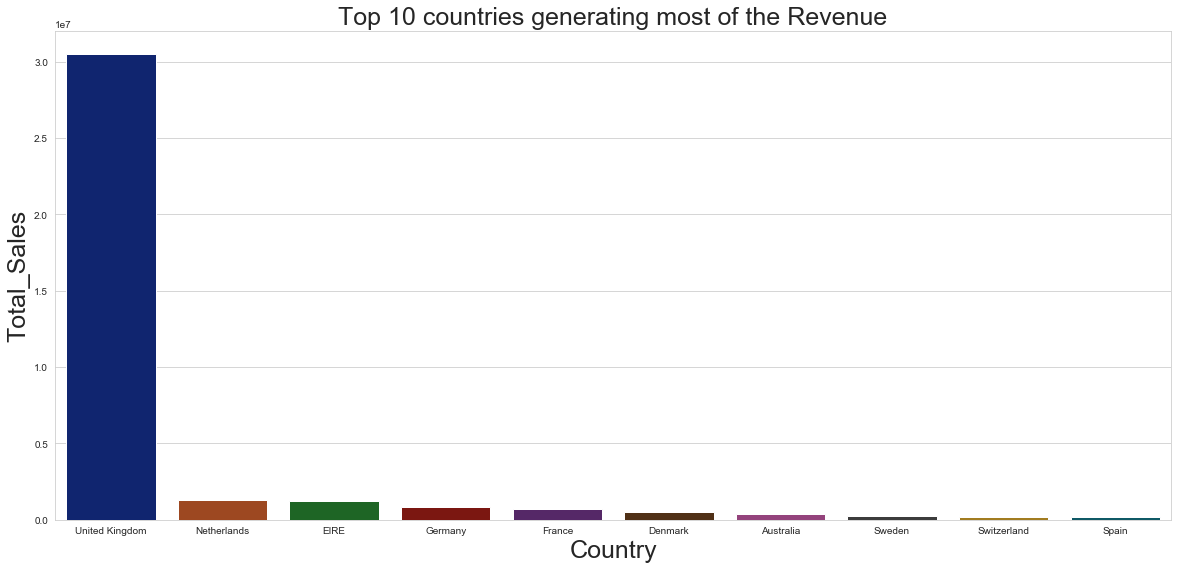

In [187]:
Top_10_Countries=df.groupby('Country')[['Total_Amount']].sum().sort_values('Total_Amount',ascending=False).reset_index().head(10)
print(Top_10_Countries)
fig=plt.figure(figsize=(20,9))
sns.barplot(data=Top_10_Countries,x='Country',y='Total_Amount',palette='dark')
plt.title('Top 10 countries generating most of the Revenue',size=25)
plt.xlabel('Country',size='25')
plt.ylabel('Total_Sales',size='25')

Top 10 countries with worst revenue

These are countries with low total sales for the company. The company needs a better marketing strategy so that sales can be increased in these regions.

              Country  Total_Amount
0        Saudi Arabia        281.17
1             Nigeria        346.39
2         West Indies       1326.41
3      Czech Republic       1891.72
4               Korea       2145.82
5  European Community       2285.75
6             Lebanon       2465.88
7              Brazil       2501.87
8             Bahrain       2864.37
9                 RSA       3819.74


Text(0, 0.5, 'Total_Sales')

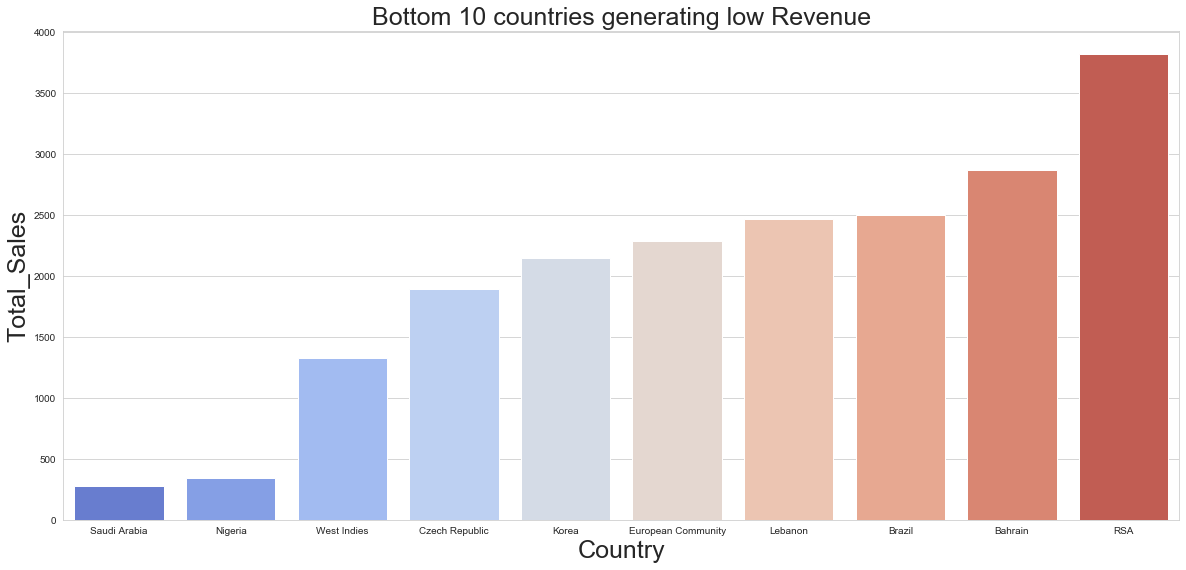

In [188]:
Top_10_Countries=df.groupby('Country')[['Total_Amount']].sum().sort_values('Total_Amount',ascending=True).reset_index().head(10)
print(Top_10_Countries)
fig=plt.figure(figsize=(20,9))
sns.barplot(data=Top_10_Countries,x='Country',y='Total_Amount',palette='coolwarm')
plt.title('Bottom 10 countries generating low Revenue',size=25)
plt.xlabel('Country',size='25')
plt.ylabel('Total_Sales',size='25')

TOTAL SALES PER YEAR

The below analytics shows that most of the company's sales were generated in 2018, then following by a slight decrease in 2019. Its difficult to analyse the 2017 data of the company as it shows data for the month of December only.

Year
2017    1.443844e+06
2018    1.870617e+07
2019    1.696653e+07
Name: Total_Amount, dtype: float64


Text(0, 0.5, 'Total_Sales')

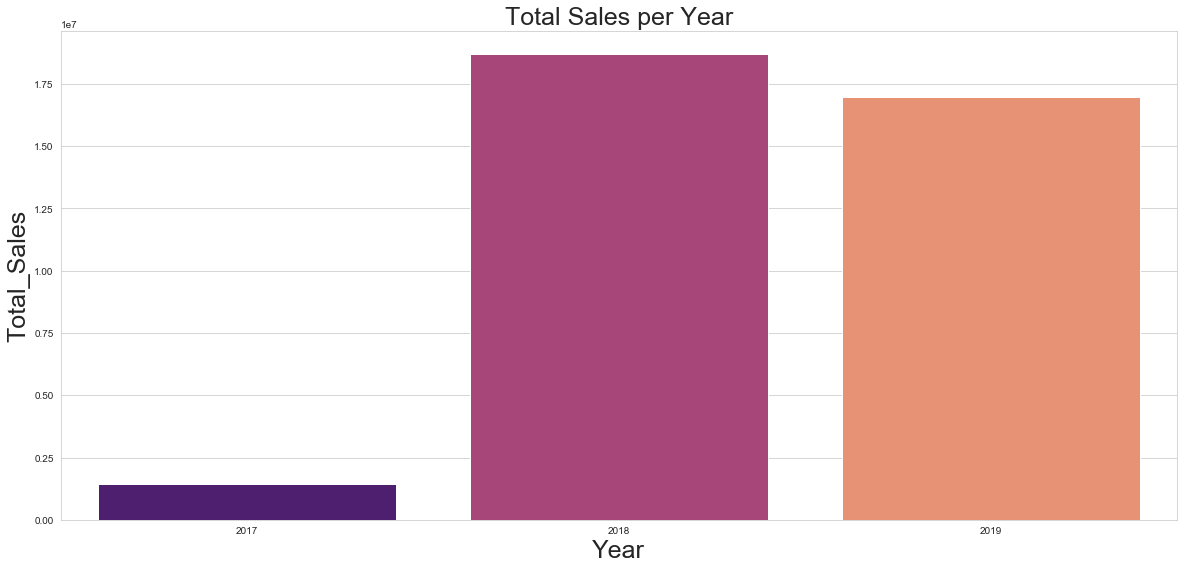

In [189]:
df['Year']=df['BillDate'].dt.year
Total_Yearly_Sales=df.groupby('Year')['Total_Amount'].sum()
print(Total_Yearly_Sales)
fig=plt.figure(figsize=(20,9))
sns.barplot(data=Total_Yearly_Sales.reset_index(), x=Total_Yearly_Sales.index,y='Total_Amount',palette='magma')
plt.title('Total Sales per Year',size=25)
plt.xlabel('Year',size='25')
plt.ylabel('Total_Sales',size='25')

Calculating the total sales per month for each year

As shown below, 2017 has a total sales for December only. In 2018, the month of July generated the least total sales of about 1M and November was the most profitable month with about 2.7M total sales. In the year 2019, December was least month which got about 886K total sales and November again showed that it is the most generating revenue month with about 2.9M total sales.

In [190]:
df['Year']=df['BillDate'].dt.year
df['Month']=df['BillDate'].dt.month
Total_Monthly_Sales=df[df['Year']==2017]
Total_Monthly_Sales=Total_Monthly_Sales.groupby('Month')['Total_Amount',].sum()
print(Total_Monthly_Sales.reset_index())


   Month  Total_Amount
0     12    1443844.05


    Month  Total_Amount
0       1   1266234.902
1       2   1222033.586
2       3   1634056.481
3       4   1251815.022
4       5   1299376.550
5       6   1323933.910
6       7   1201931.900
7       8   1481108.460
8       9   1729257.301
9      10   2139303.780
10     11   2412259.282
11     12   1744859.370


Text(0, 0.5, 'Total_Sales')

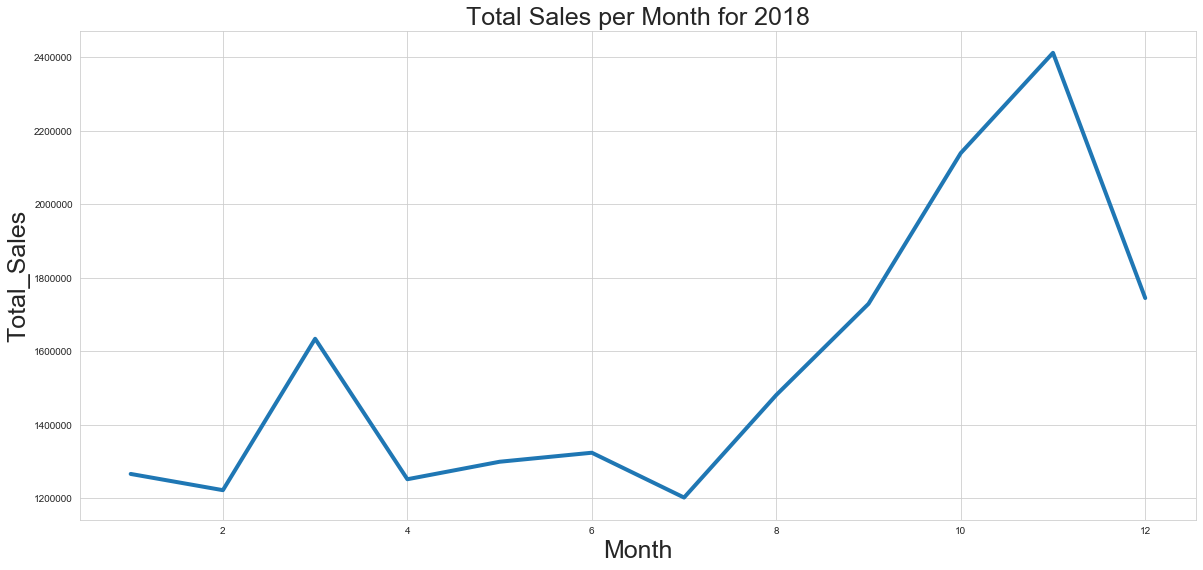

In [191]:
df['Year']=df['BillDate'].dt.year
df['Month']=df['BillDate'].dt.month
Total_Monthly_Sales=df[df['Year']==2018]
Total_Monthly_Sales=Total_Monthly_Sales.groupby('Month')['Total_Amount'].sum()
print(Total_Monthly_Sales.reset_index())
fig=plt.figure(figsize=(20,9))
sns.lineplot(x='Month',y='Total_Amount',data=Total_Monthly_Sales.reset_index(),lw=4)
plt.title('Total Sales per Month for 2018',size=25)
plt.xlabel('Month',size='25')
plt.ylabel('Total_Sales',size='25')

    Month  Total_Amount
0       1   1013832.380
1       2    962212.150
2       3   1267988.610
3       4    983217.851
4       5   1383955.080
5       6   1321857.160
6       7   1301074.481
7       8   1389592.000
8       9   2006432.372
9      10   2113935.590
10     11   2472237.740
11     12    750198.380


Text(0, 0.5, 'Total_Sales')

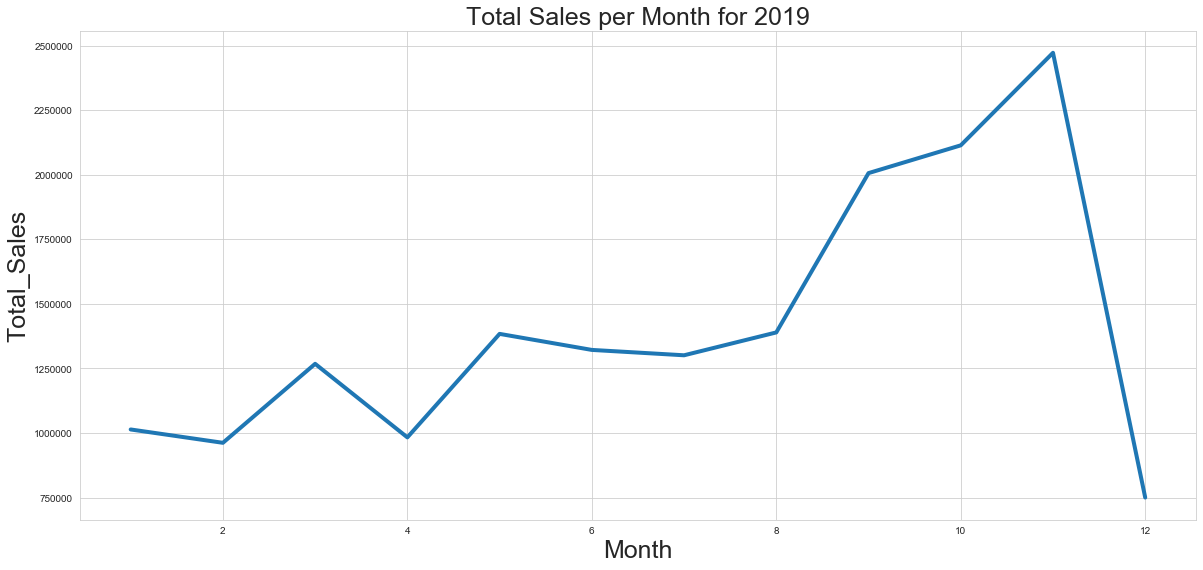

In [192]:
df['Year']=df['BillDate'].dt.year
df['Month']=df['BillDate'].dt.month
Total_Monthly_Sales=df[df['Year']==2019]
Total_Monthly_Sales=Total_Monthly_Sales.groupby('Month')['Total_Amount',].sum()
print(Total_Monthly_Sales.reset_index())
fig=plt.figure(figsize=(20,9))
sns.lineplot(data=Total_Monthly_Sales.reset_index(),x=Total_Monthly_Sales.index,y='Total_Amount',lw=4)
plt.title('Total Sales per Month for 2019',size=25)
plt.xlabel('Month',size='25')
plt.ylabel('Total_Sales',size='25')

Top 10 most buying customers

17841.0    13097
14911.0    11613
12748.0     7307
14606.0     6709
14096.0     5128
Name: CustomerID, dtype: int64


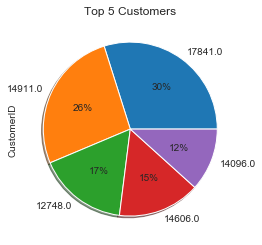

In [193]:
Top_10_Customers=df['CustomerID'].value_counts().head(5)
print(Top_10_Customers)
Top_10_Customers.plot(kind='pie',shadow=True,title='Top 5 Customers',autopct='%.0f%%')

Summary

* We should continue cooperation with United Kingdom, Netherlands, EIRE, Germany, France, Denmark, Australia, Sweden, Switzerland, Spain
* The best sales month in 2018 was November and the worst is July
* The best sales month in 2019 was again November and the worst was December.
* Most Purchased products were White hanging heart t-light holder,Regency cakestand 3 tier, Assorted colour bird ornament, Jumbo bag red retrospot, Lunch bag  black skull.